## Data Preprocessing



*   Removed missing values since there were only 9 missing values.
*   Dropped the Columns that seemed irrelevant or overlapping.
*   Transformed categorical columns using Label Encoding.
*   Split the data into training and testing sets.



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel("/content/Dataset.xlsx")
df = df.dropna()
df_cleaned = df.drop(['Restaurant ID', 'Country Code', 'Address','Locality Verbose'], axis=1)

In [3]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
num_cols = df_cleaned.select_dtypes(include=['float', 'int']).columns

for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].astype(str)

label_encoder = LabelEncoder()

for col in cat_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

cat_encoded = df_cleaned[cat_cols]
num_df = df_cleaned[num_cols]

df_preprocessed = pd.concat([cat_encoded, num_df], axis=1)

In [4]:
X = df_preprocessed.drop(['Aggregate rating'], axis=1)
y = df_preprocessed['Aggregate rating']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Development & Evaluation



*   Decision Tree Regression to train the data using "max_depth=10 min_samples_leaf=2, min_samples_split=5" as specified hyperparameter.
*   Performance Evaluation of model using metrics "Mean Squared Error, R^2 Score and Mean Absolute Error"



In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

#Define & Train Model
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,)
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')



Mean Squared Error: 0.03264277675945895
R^2 Score: 0.9857457127706678
Mean Absolute Error: 0.12440710743301639


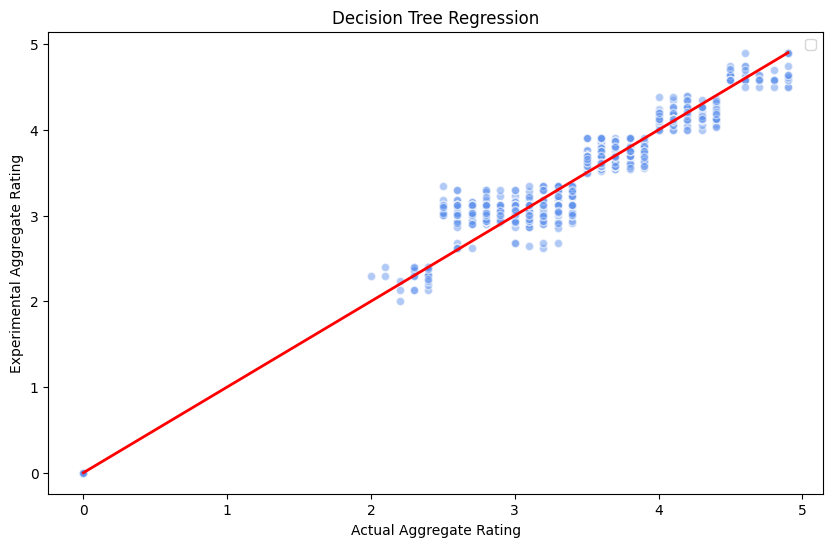

In [7]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5,edgecolor="white",color='cornflowerblue', edgecolors='White')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Aggregate Rating")
plt.ylabel("Experimental Aggregate Rating")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Interpretation

In [8]:
feature_importances = model.feature_importances_
for i, importance_value in enumerate(feature_importances):
    print(f' {X.columns[i]}: {importance_value}')

 Restaurant Name: 0.00020603822173515822
 City: 0.00011607060430946116
 Locality: 0.0001268378442797207
 Cuisines: 0.0004022289261879077
 Currency: 1.6704523776856757e-05
 Has Table booking: 1.4749742492708202e-05
 Has Online delivery: 7.280582906287414e-05
 Is delivering now: 0.0
 Switch to order menu: 0.0
 Rating color: 0.08978969716123833
 Rating text: 0.0
 Longitude: 0.00041916315472757885
 Latitude: 0.0005244157637035419
 Average Cost for two: 0.0002405178133272917
 Price range: 2.2704593455051463e-05
 Votes: 0.9080480658217034


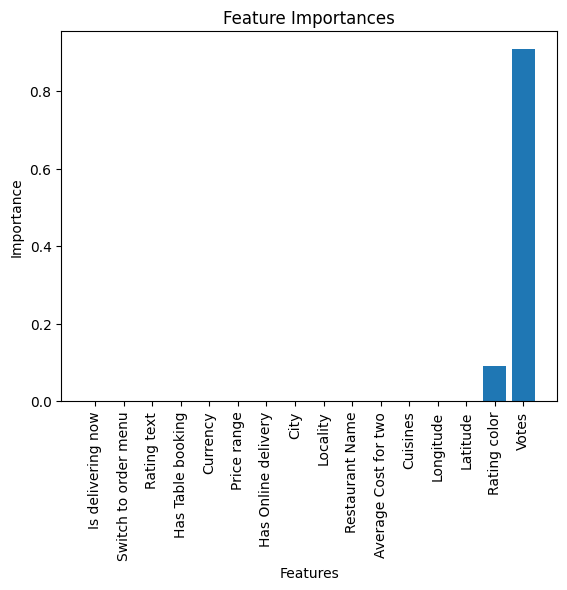

In [9]:
# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=True)

# Visualize feature importances
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

The most influential features affecting restaurant ratings are Rating Color and Votes.